# Assignment06
* 2019220177 Seungwook Oh


## Initial Setting

### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/MIMP

/content/drive/My Drive/MIMP


### git Setting

In [15]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Assignment06/Assignment06.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git config --global user.email "sooonchang@gmail.com"
!git config --global user.name "SooonChang"

In [16]:
!git add .
!git commit -m "Assignment06: 1.Plot the training data"
!git push origin master

[master c32b556] Assignment06: 1.Plot the training data
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Assignment06/Assignment06.ipynb (97%)
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.44 KiB | 624.00 KiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/SooonChang/MIMP
   50ae415..c32b556  master -> master


## 1. Plot the training data
* plot the training data points (x,y) with their labels l in colors (blue for label 0 and red for label 1)

### Import Liabraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Load training data

In [0]:
data = np.genfromtxt("./Assignment06/data-nonlinear.txt", delimiter=',')
x = data[:,0]
y = data[:,1]
label = data[:,2]

### Plot the training data

In [0]:
x_label0 = x[label == 0]
y_label0 = y[label == 0]
x_label1 = x[label == 1]
y_label1 = y[label == 1]

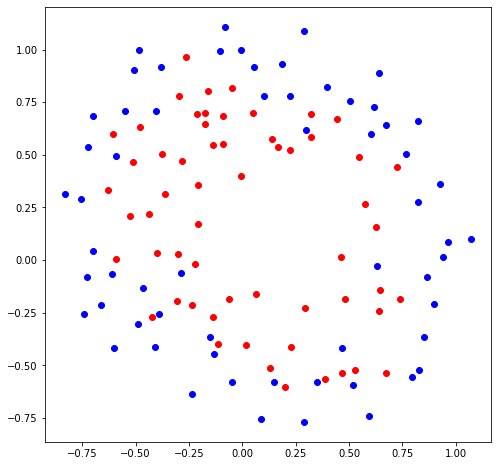

In [113]:
plt.figure(figsize=(8,8))
plt.scatter(x_label0,y_label0,c = 'b')
plt.scatter(x_label1,y_label1, c='r')
plt.show()

## 2. Write down the high dimensional function $g(x,y:\theta)$
* write down the equation for the non-linear function $g(x,y:\theta)$ used for the classifier in LaTeX format

### $g(x,y;\theta) = \theta_0 + \theta_1x + \theta_2y + \theta_3xy + \theta_4x^2 +\theta_5y^2 + \theta_6x^2y + \theta_7xy^2 + \theta_8x^3 + \theta_9y$

### define Non-linear Regression model

In [0]:
def sigmoid(x):

  return 1/(1 + np.exp(-x))


class Non_linear_regression():

  def __init__(self, eta = 0.0005, n_iterations = 10000):
    self.eta = eta
    self.n_iterations = n_iterations
    
    np.random.seed()
    self.w0 = np.random.randn(1)
    self.w1 = np.random.randn(1)
    self.w2 = np.random.randn(1)
    self.w3 = np.random.randn(1)
    self.w4 = np.random.randn(1)
    self.w5 = np.random.randn(1)
    self.w6 = np.random.randn(1)
    self.w7 = np.random.randn(1)
    self.w8 = np.random.randn(1)
    self.w9 = np.random.randn(1)

  def fit(self,x,y,label):
    self.cost_ = []
    m = x.shape[0]
    delta = 1e-7 # Prevent overflow

    x_2 = np.power(x,2)
    x_3 = np.power(x,3)
    y_2 = np.power(y,2)
    y_3 = np.power(y,3)

    for i in range(self.n_iterations):
      g = self.w0 + self.w1*x + self.w2*y + self.w3*(x*y) + self.w4*x_2 + self.w5*y_2 + self.w6*(x_2*y)+ self.w7*(x*y_2) + self.w8*x_3 + self.w9*y_3
      sigma_g = sigmoid(g)
      cost = np.sum(-label*np.log(sigma_g + delta) - (1-label)*np.log(1-sigma_g + delta))
      cost /=m
      self.cost_.append(cost)

      # update parameters

      self.w0 -= (self.eta/m)*np.sum(sigma_g-label)
      self.w1 -= (self.eta/m)*np.dot((sigma_g-label).T,x)
      self.w2 -= (self.eta/m)*np.dot((sigma_g-label).T,y)
      self.w3 -= (self.eta/m)*np.dot((sigma_g-label).T,x*y)
      self.w4 -= (self.eta/m)*np.dot((sigma_g-label).T,x_2)
      self.w5 -= (self.eta/m)*np.dot((sigma_g-label).T,y_2)
      self.w6 -= (self.eta/m)*np.dot((sigma_g-label).T,x_2*y)
      self.w7 -= (self.eta/m)*np.dot((sigma_g-label).T,x*y_2)
      self.w8 -= (self.eta/m)*np.dot((sigma_g-label).T,x_3)
      self.w9 -= (self.eta/m)*np.dot((sigma_g-label).T,y_3)
    
    return self
    
  def parameters(self):

    return self.cost_


In [0]:
n_iterations = 100000
eta = 0.0005
regress = Non_linear_regression(eta= eta, n_iterations= n_iterations)

In [122]:
regress.fit(x,y,label)

In [0]:
cost = regress.parameters()

In [0]:
iteration = np.arange(0,n_iterations)

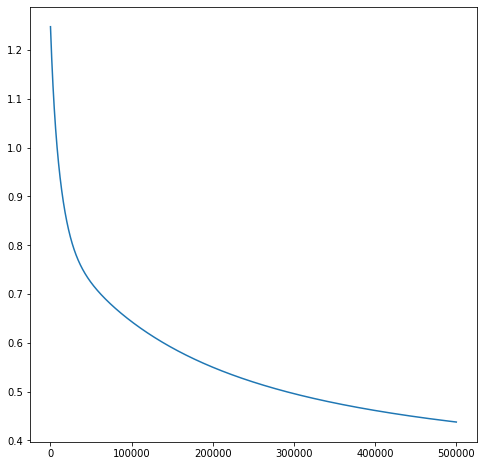

In [125]:
plt.figure(figsize=(8,8))
plt.plot(iteration,cost)